In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import pandas as pd
import pickle
import seaborn as sns
from colorama import Fore, Back, Style

### Preliminary Datasets Review and Analysis

In [2]:
from IPython.display import Image
Image(url="dataset_relationship.gif")

In [3]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [5]:
print(Fore.YELLOW+ Back.BLACK + "Cab_Data.csv Data Dimension:",Style.RESET_ALL)
cab_data.shape

Cab_Data.csv Data Dimension: 


(359392, 7)

In [6]:
#check to see if there are any missing values
cab_data.isnull().values.any()

False

In [7]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
#cab_data.describe()

In [9]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [11]:
print(Fore.YELLOW+ Back.BLACK + "City.csv Data Dimension:",Style.RESET_ALL)
city.shape

City.csv Data Dimension: 


(20, 3)

In [12]:
#check to see if there are any missing data values
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [13]:
customer_id = pd.read_csv("Customer_ID.csv")
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [14]:
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [15]:
print(Fore.YELLOW+ Back.BLACK + "Customer_ID.csv Data Dimension:",Style.RESET_ALL)
customer_id.shape

Customer_ID.csv Data Dimension: 


(49171, 4)

In [16]:
# check missing values
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [17]:
transaction_id = pd.read_csv("Transaction_ID.csv")
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [18]:
transaction_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [19]:
print(Fore.YELLOW+ Back.BLACK + "transaction_id.csv Data Dimension:",Style.RESET_ALL)
transaction_id.shape

transaction_id.csv Data Dimension: 


(440098, 3)

In [20]:
# check any missing values
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Concatenate datasets by Unique Identifiers

In [21]:
from IPython.display import Image
Image(url="data_columns.gif")

#### Join Transaction_ID with Customer_ID dataset by Customer ID column

In [22]:
df1 =pd.merge(transaction_id, customer_id, left_on="Customer ID", right_on="Customer ID")
df1

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


#### Join Cab_Data with City dataset by City column

In [23]:
df2 =pd.merge(cab_data, city, left_on="City", right_on="City")
df2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


#### Finally Join df1 and df2 into the complete dataframe df

In [24]:
df = pd.merge(df1, df2, left_on="Transaction ID", right_on="Transaction ID")

In [25]:
df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Cash,Male,28,10813,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Card,Male,28,10813,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Card,Male,27,9237,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Card,Male,27,9237,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,1/7/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,"671,238","25,063"
359388,10439799,12490,Cash,Male,33,18713,1/3/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,"1,177,609","27,247"
359389,10439838,41414,Card,Male,38,3960,1/4/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,"631,442","5,712"
359390,10439840,41677,Cash,Male,23,19454,1/6/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,"631,442","5,712"


In [26]:
# Check any missing values
df.isnull().sum().sum()

0

In [27]:
df.dtypes

Transaction ID          int64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
dtype: object

In [28]:
df.shape

(359392, 14)

In [29]:
df.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000


In [30]:
df["Transaction ID"].count()

359392

In [31]:
#check total number of unique Customer ID
customerid_unique = df["Customer ID"].value_counts()

# check top 20 customers with the most cab trips
customerid_unique.head(20)

494     54
2939    53
2766    51
1070    51
858     50
1067    50
1628    50
1803    50
944     50
903     50
126     50
2539    49
1360    49
1103    49
2895    49
2577    49
205     48
1673    48
2776    48
336     48
Name: Customer ID, dtype: int64

In [32]:
df["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

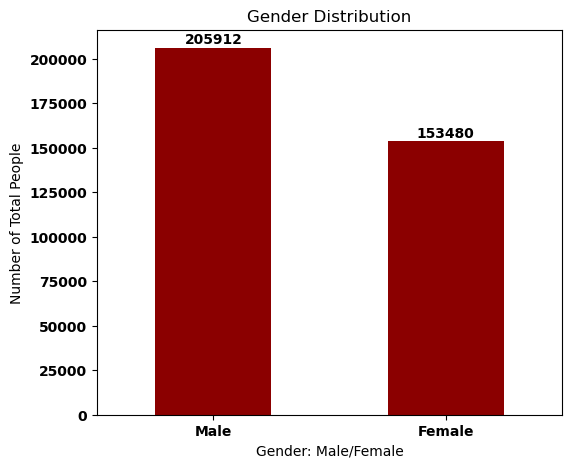

Male      205912
Female    153480
Name: Gender, dtype: int64




([<matplotlib.patches.Wedge at 0x1c46eccdec8>,
 [Text(0.21861722823879948, 0.3349723981422718, 'Male'),
  Text(-0.2459443817686494, -0.37684394791005577, 'Female')],
 [Text(0.6831788382462484, 1.0467887441945993, '57.29%'),
  Text(-0.7105059917760983, -1.0886602939623833, '42.71%')])

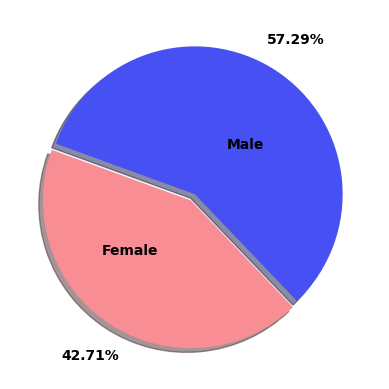

In [63]:
fig = plt.figure(figsize=(6,5))
gender = df["Gender"].value_counts()
ax = gender.plot(kind="bar", rot=0, color="darkred")
ax.set_title("Gender Distribution", y=1)
ax.set_xlabel("Gender: Male/Female")
ax.set_ylabel("Number of Total People")#4650f3
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 

plt.show()

print(df['Gender'].value_counts())
print("\n")
labels = 'Male', 'Female'
explode =(0,0.05)
size = [60, 40]

plt.pie(df['Gender'].value_counts(), explode = explode, labels = labels, colors=['#4650f3', '#f88e94'],autopct='%1.2f%%', shadow=True,
       counterclock=False,  pctdistance=1.25, labeldistance=.4, startangle = 160)

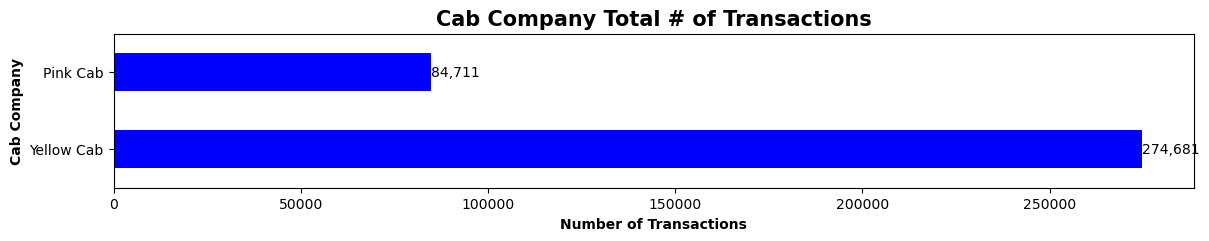

In [34]:
fig = plt.figure(figsize=(16,2))
company = df["Company"].value_counts()
ax = company.plot(kind="barh", rot=0, color="blue")
ax.set_title("Cab Company Total # of Transactions", y=1, fontsize=15, fontweight="bold")
ax.set_xlabel("Number of Transactions", fontweight ="bold", fontsize=10)
ax.set_ylabel("Cab Company", fontweight ="bold", fontsize=10)
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
fig.subplots_adjust(left=None, bottom=None, right=0.8, top=None, wspace=None, hspace=None)

plt.show()

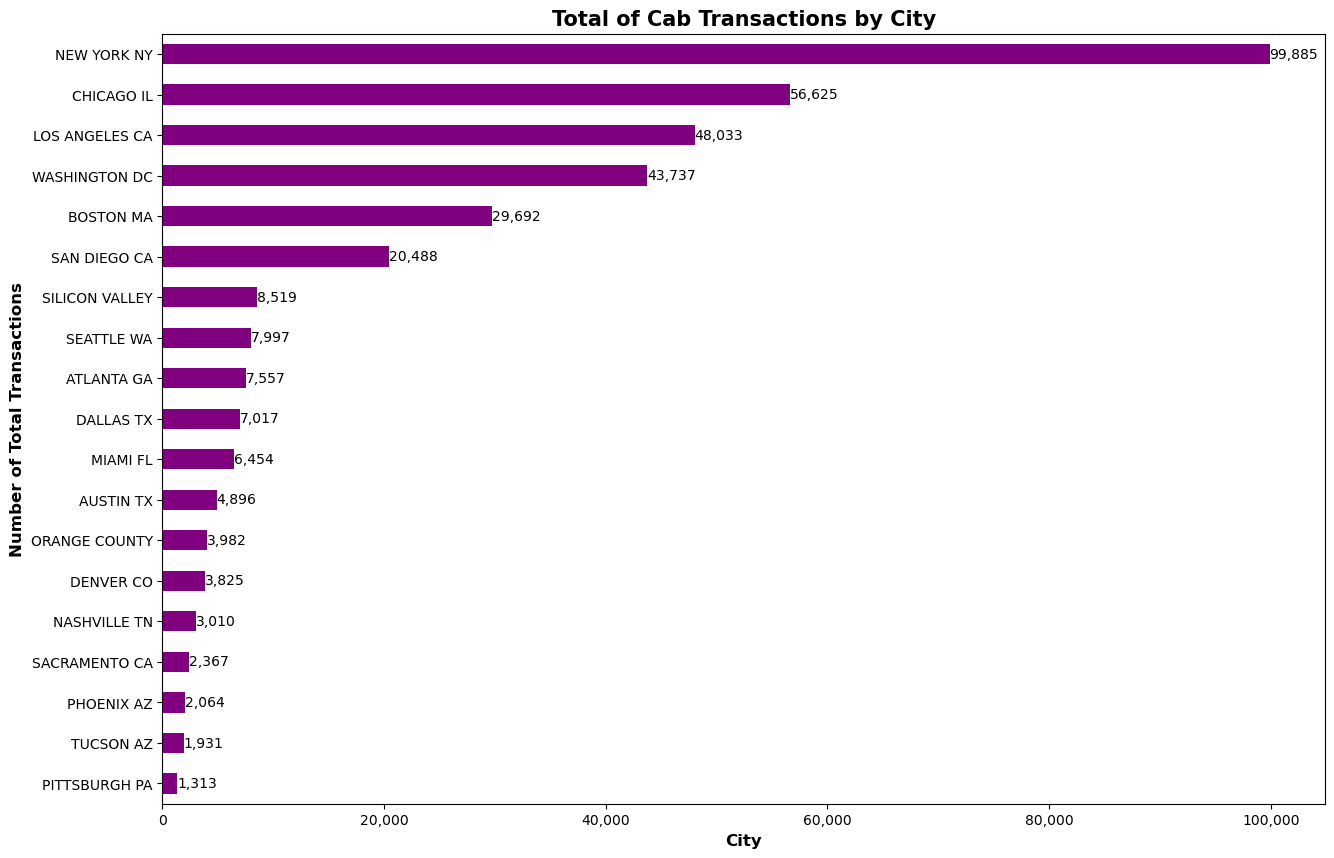

In [35]:
import sys
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(15,10))
total_city_counts = df["City"].value_counts().sort_values() # in Descending order
ax = total_city_counts.plot(kind="barh", rot=0, color="purple")
ax.set_title("Total of Cab Transactions by City", y=1, fontsize=15, fontweight="bold")
ax.set_xlabel("City", fontweight ="bold", fontsize=12)
ax.set_ylabel("Number of Total Transactions", fontweight="bold", fontsize=12)

if __name__ == "__main__":
    ax.set_xticklabels(["0", "20,000", "40,000", "60,000", "80,000", "100,000"])

for bars in ax.containers:
     ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
plt.rcParams["font.weight"] = "bold"
plt.show()

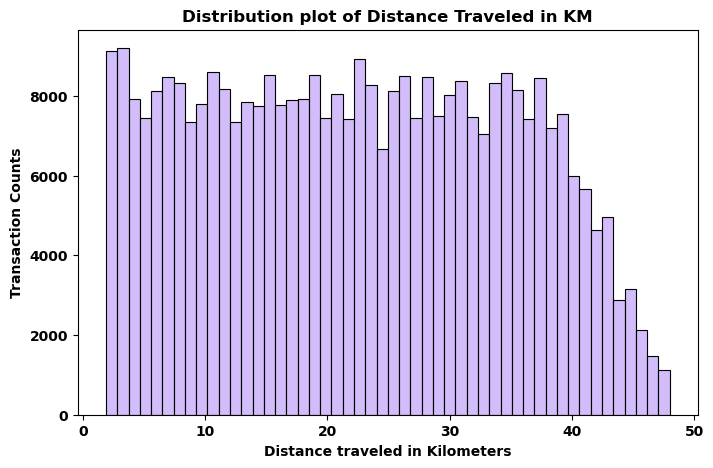

In [36]:
# total distance travelled 
fig = plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x="KM Travelled", bins = 50, color='#c3a6f7')
ax.set_xlabel(r"Distance traveled in Kilometers", fontweight="bold")
ax.set_ylabel(r"Transaction Counts", fontweight="bold")
plt.title("Distribution plot of Distance Traveled in KM", fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.show()

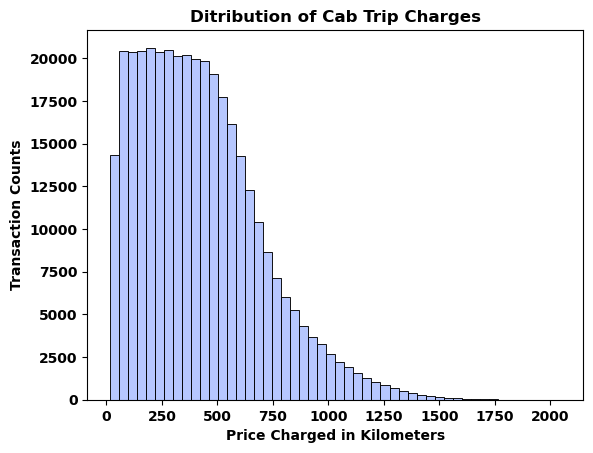

In [37]:
# Total price charged
# total distance travelled 
ax = sns.histplot(data=df, x="Price Charged", bins = 50, color="#9eb5fe")
ax.set_xlabel(r"Price Charged in Kilometers", fontweight="bold")
ax.set_ylabel(r"Transaction Counts", fontweight="bold")
plt.title("Ditribution of Cab Trip Charges", fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.show()

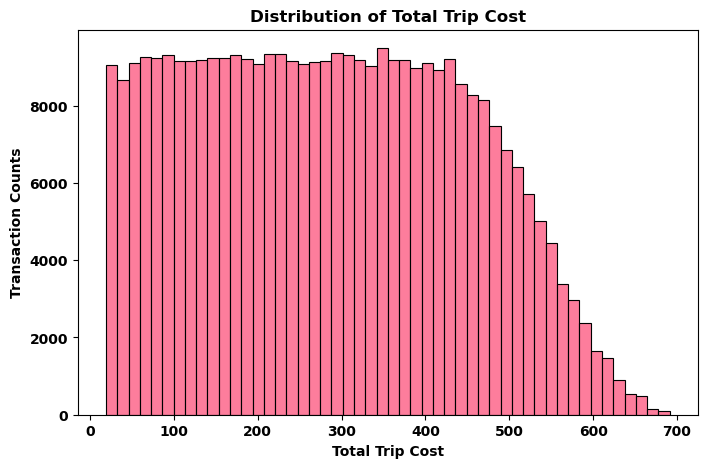

In [38]:
fig = plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x="Cost of Trip", bins=50, color="#fd527b")
ax.set_xlabel(r"Total Trip Cost", fontweight="bold")
ax.set_ylabel(r"Transaction Counts", fontweight="bold")
plt.title("Distribution of Total Trip Cost", fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.show()

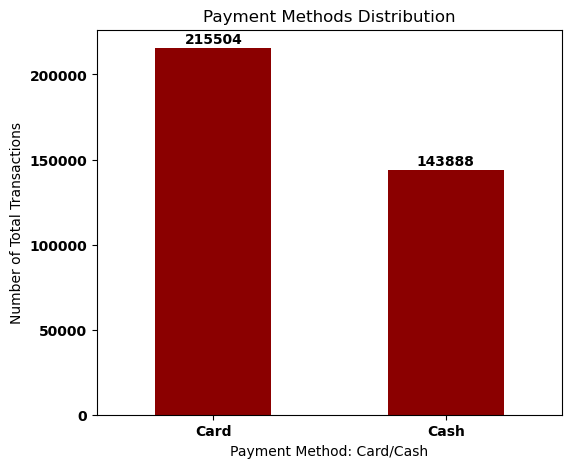

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64




([<matplotlib.patches.Wedge at 0x1c47b600d08>,
 [Text(0.3911634053605675, 0.08361333809102695, 'Card'),
  Text(-0.4400588310306384, -0.0940650053524052, 'Cash')],
 [Text(1.2223856417517733, 0.26129168153445914, '59.96%'),
  Text(-1.2712810674218442, -0.27174334879583717, '40.04%')])

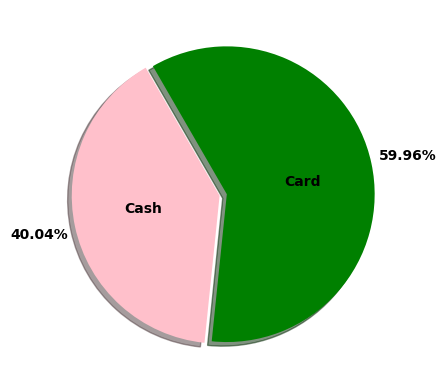

In [59]:
# Method of Payment Distribution
fig = plt.figure(figsize=(6,5))
gender = df["Payment_Mode"].value_counts()
ax = gender.plot(kind="bar", rot=0, color="darkred")
ax.set_title("Payment Methods Distribution", y=1)
ax.set_xlabel("Payment Method: Card/Cash")
ax.set_ylabel("Number of Total Transactions")
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 

plt.show()

print(df['Payment_Mode'].value_counts())
print("\n")
labels = 'Card', 'Cash'
explode =(0,0.05)
size = [60, 40]

plt.pie(df['Payment_Mode'].value_counts(), explode = explode, labels = labels, colors=['green', 'pink'],autopct='%1.2f%%', shadow=True,
       counterclock=False,  pctdistance=1.25, labeldistance=.4, startangle = 120)

In [65]:
# Total # of users per city
